# Numpy and Matplotlib synthesis exercise


Read the data file `Variability_Catalina_list1.csv` which contains lightcurves of an ensemble of objects observed in the context of the Catalina survey (http://nesssi.cacr.caltech.edu/DataRelease/). 

This file contains the following columns separated by 'tab' characters: `InputID	ID	Mag	Magerr	RA	Decl	MJD	Blend`. Their meaning is the following: 
* [0] `InputID`: Object Name 
* [1] `ID`: Object ID in the survey
* [2] `Mag`: Object Magnitude ($ m = -2.5 * \log(Flux)$ + zeropoint)
* [3] `Magerr`: Formal error on the magnitude
* [4] `RA`: Right ascension  (degrees)
* [5] `Decl`: Declination  (degrees)
* [6] `MJD`: Modified julian day (day). 
* [7] `Blend`: 0 if the measurement is clean, 1 if there is a possible contamination by another target. 

The file contains the observed magnitude of the following (gravitationally lensed) quasars: 'DESJ0407-5006', 'HE1104-1805', 'HS2209+1914' 'J0011-0845', 'J0228+3953', 'Q1355-2257', 'SDSSJ0904+1512'. 
You want to visualise the lightcurve (x=MJD, y=Mag, yerr=Maggerr) associated to each individual object. You also want to measure its mean magnitude, and the standard deviation on the magnitude, as well as its minimum / maximum magnitude over the period of observation and save those value into a table. Try to reach this goal using only "standard" python commands and commands from numpy and matplotlib arrays. To ease your task, a possible methodology is outlined below.  

**Possible methodology:**
- (1) Read the file and save the output into a numpy array. How many rows and columns does contain the array ? What is the dtype of your array ? 
- (2) Create a sub-array for a single object (e.g. HS2209+1914) using fancy indexing. 
- (3) create an array with 4 columns `MJD, Mag, magerr, blend` , converting strings to floats.
- (4) Get rid of data points with Blend > 0 
- (5) Plot the lightcurve at the screen 
- (6) Calculates mean, std, min, max with numpy 
- (7) Repeat the operation for the 7 object using a for loop.i.e. you can create a list of arrays, each one containing MJD, mag, magerr for each object. In the same loop you can make a plot. You can include the plotting in the loop. To plot into a single figure, think of using plt.subplots(rows=7, figsize=(15,20)). 
- BONUS: How would you proceed to know the names of the individual objects if I did not provide the list ? 

**TIPs:** 

* A file's row mixes strings and floats. You may therefore first create an array of strings (1 single dtype in an array). One of the arguments of `np.loadtxt()` is the data type, so you can read a list of strings with `np.loadtxt(filename, dtype=str)`
* To convert an array of numbers whose type is strings into float: 
``` python 
myarray_strings = np.array(['1', '2', '3'])  
myarray_floats = np.array(myarray_strings , dtype = float)
```

In [1]:
# (0)
import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
# (1)

Tdata = Table.read('Variability_Catalina_list1.csv',format = 'ascii')
data = np.array(Tdata) # convert the table into an numpy array
print(data.shape) # number of rows and columns
print(data.dtype) # data type of the array's elements

(2308,)
[('InputID', '<U14'), ('ID', '<U13'), ('Mag', '<f8'), ('Magerr', '<f8'), ('RA', '<f8'), ('Decl', '<f8'), ('MJD', '<f8'), ('Blend', '<i4')]


In [3]:
# (2)

count = 0 # because data starts with 0 indice
quasar_name = 'HS2209+1914'
index = []

for row in data:
    if quasar_name in str(row):
        index.append(count)
    count = count+1    

quasar_data = data[index]
#quasar_data
#print(quasar_data.shape)
#print(quasar_data[0][1])

# quasar_data is an array containing lists

In [4]:
# (3), (4)

extract = []

for a in range(len(quasar_data)):
    if 0. == quasar_data[a][7]: # if Blend = 0
        extract.append(quasar_data[a][6]) # MJD
        extract.append(quasar_data[a][2]) # Mag
        extract.append(quasar_data[a][3]) # magerr
    
plot_data = np.array(extract)  
plot_data.resize((len(index),3)) # contrary to reshape that only affects the OUT, resize modifies the array
#print(plot_data)
print(plot_data.shape)

(371, 3)


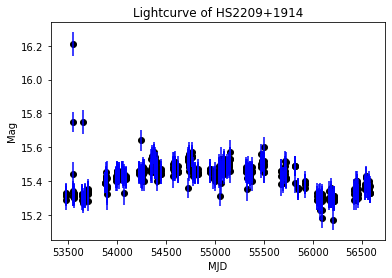

In [5]:
# (5)

f = plt.figure()
ax = f.add_subplot(1,1,1)
x, y, yerr = plot_data[:,0], plot_data[:,1], plot_data[:,2]
ax.set_xlabel('MJD'), ax.set_ylabel('Mag')
ax.set_title('Lightcurve of ' + quasar_name )
ax.errorbar(x, y, yerr, color = 'b', ls = "")
ax.scatter(x, y,color = 'black')

In [6]:
# (6)

print('mean value of magnitude :', np.mean(plot_data[:,1]))
print('standard deviation of magnitude :', np.std(plot_data[:,1]))
print('minimum value of magnitude :', np.min(plot_data[:,1]))
print('maximum value of magnitude :', np.max(plot_data[:,1]))

mean value of magnitude : 15.418706199460917
standard deviation of magnitude : 0.09287819133240349
minimum value of magnitude : 15.17
maximum value of magnitude : 16.21


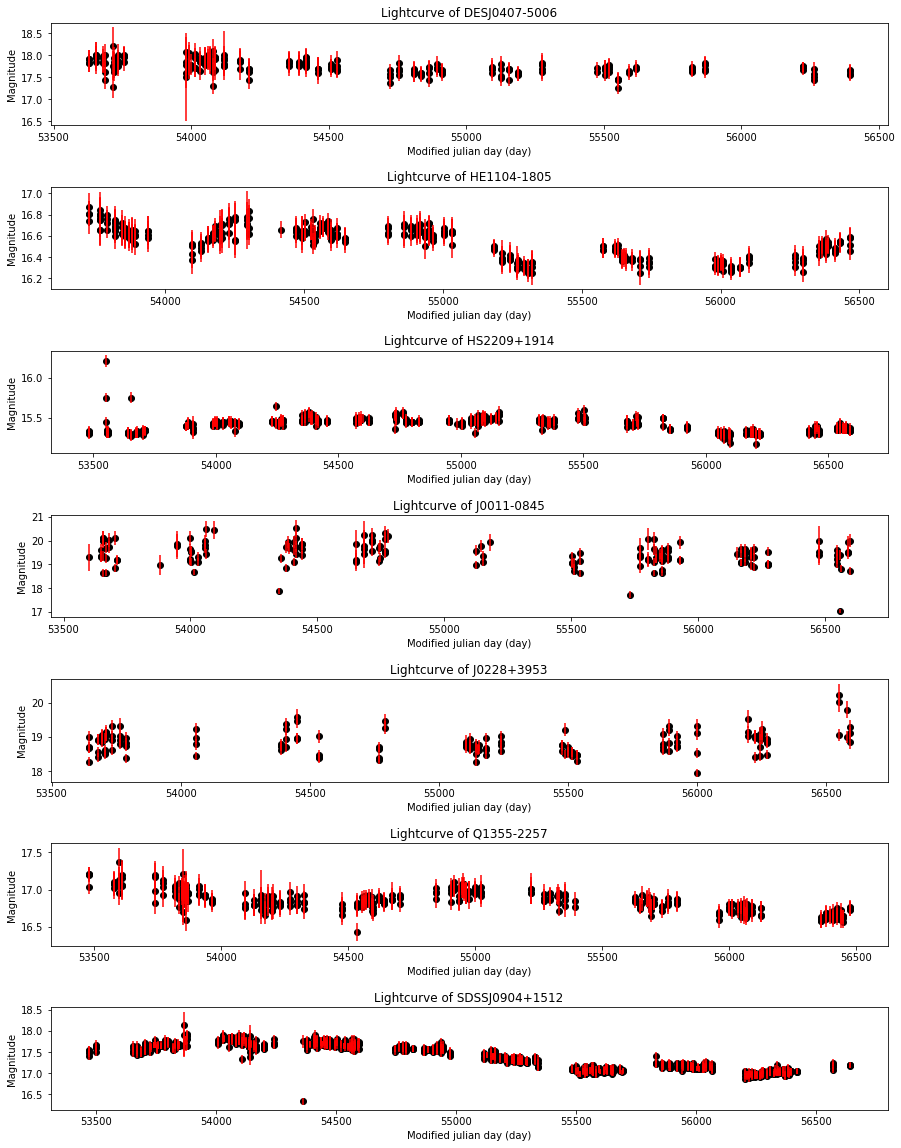

In [13]:
# (7)

quasar_name = ['DESJ0407-5006', 'HE1104-1805','HS2209+1914','J0011-0845', 'J0228+3953', 'Q1355-2257', 'SDSSJ0904+1512']
f, ax = plt.subplots(nrows=7, figsize=(15,20)) 
f.subplots_adjust(hspace=0.6)

for i in range(7):
    index = []
    extract = []
    count = 0 # because data starts with 0 indice
    for row in data:
        if quasar_name[i] in str(row):
            index.append(count)
        count = count+1    

    quasar_data = data[index]

    for a in range(len(quasar_data)):
        if 0. == quasar_data[i][7]: # if Blend = 0
            extract.append(quasar_data[a][6]) # MJD
            extract.append(quasar_data[a][2]) # Mag
            extract.append(quasar_data[a][3]) # magerr
    
    plot_data = np.array(extract)  
    plot_data.resize((len(index),3)) # contrary to reshape that only affects the OUT, resize modifies the array
    
    x, y, yerr = plot_data[:,0], plot_data[:,1], plot_data[:,2]
    ax[i].set_xlabel('Modified julian day (day)'), ax[i].set_ylabel('Magnitude')     
    ax[i].set_title('Lightcurve of ' + quasar_name[i])
    ax[i].errorbar(x, y, yerr, color = 'r',ls = " ") # plot the error bars
    ax[i].scatter(x, y, color = 'black') # plot each couple of points (Mag, MJD) 